## Observations and Insights 

1. Out of all the regimens tested, Capomulin and Ramicane appear to be by far the most effective treatments in terms of size of tumor volume. The summary statistics demonsrate smaller mean and median tumor size for those treatments. The treatments also had the highest number of mice count which helps to explain their smaller variance, standard deviation, and SEM.
2. The Placebo treatment appears to be as effective as most of the other regimens, excluding Capomulin and Ramicane.
3. There appears to be a strong correlation (r = 0.84) between a mouse's weight and tumor volume for those mice in the Capomulin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "../resources/Mouse_metadata.csv"
study_results_path = "../resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1893 rows x 8 columns]

In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["Mouse ID"][merged_df.duplicated(["Mouse ID", "Timepoint"])]

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = merged_df[merged_df["Mouse ID"]=="g989"]
dup_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[(merged_df["Mouse ID"]!="g989")]
# clean_df = merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep = "first", inplace = False)

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# series

volume_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
volume_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
volume_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
volume_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
volume_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# create dataframe
summary_df = pd.DataFrame({
    "Mean": volume_mean,
    "Median": volume_median,
    "Variance": volume_var,
    "Standard Deviation": volume_std,
    "SEM": volume_sem
})
summary_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var", "std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

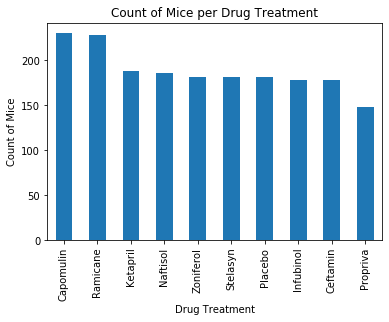

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_and_count = clean_df["Drug Regimen"].value_counts()
treatment_and_count.plot(kind="bar");
plt.title("Count of Mice per Drug Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Count of Mice");

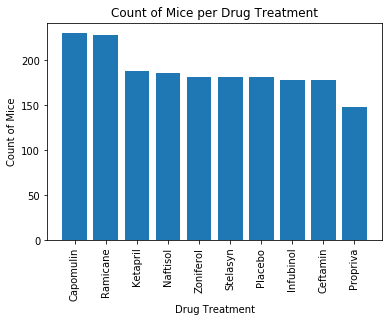

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(treatment_and_count.index.values, treatment_and_count.values)
plt.xticks(rotation=90)
plt.title("Count of Mice per Drug Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Count of Mice");

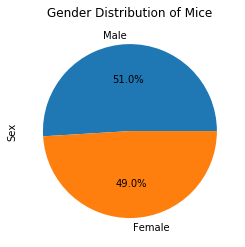

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df["Sex"].value_counts()
gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution of Mice");


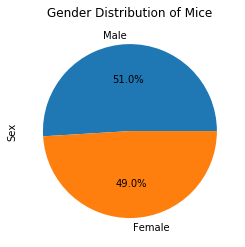

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(gender, labels=labels, autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")
plt.ylabel("Sex");


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby("Mouse ID").max()["Timepoint"]
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug  in drugs_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_df.loc[merged_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]

    # add subset 
    tumor_volume.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"Outlier: {drug} {outlier}")

Outlier: Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outlier: Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


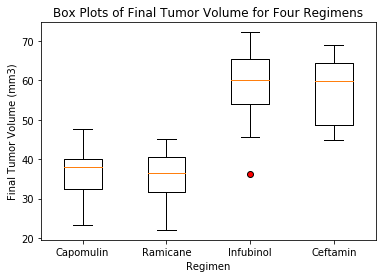

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_outlier = dict(markerfacecolor='r')
plt.boxplot(tumor_volume, labels=drugs_list, flierprops=red_outlier)
plt.title("Box Plots of Final Tumor Volume for Four Regimens")
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)");

## Line and Scatter Plots

In [16]:
# get info for specific mouse treated with Capomulin
capomulin_mouse = clean_df[(clean_df["Drug Regimen"]== "Capomulin") & (clean_df["Mouse ID"] == "b128")]
capomulin_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
472      b128          5           45.651331                 0    Capomulin   
679      b128         10           43.270852                 0    Capomulin   
719      b128         15           43.784893                 0    Capomulin   
933      b128         20           42.731552                 0    Capomulin   
1268     b128         25           43.262145                 1    Capomulin   
1400     b128         30           40.605335                 1    Capomulin   
1547     b128         35           37.967644                 1    Capomulin   
1629     b128         40           38.379726                 2    Capomulin   
1764     b128         45           38.982878                 2    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
472   Female           9          22  
679   Female           9          22  
719   Female           9          22  
933   Female           9          22  
1268  Female           9          22  
1400  Female           9          22  
1547  Female           9          22  
1629  Female           9          22  
1764  Female           9          22

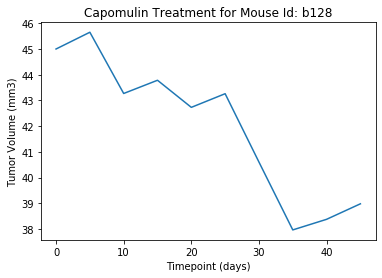

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axis = capomulin_mouse["Timepoint"].values
y_axis = capomulin_mouse["Tumor Volume (mm3)"].values

plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment for Mouse Id: b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)");

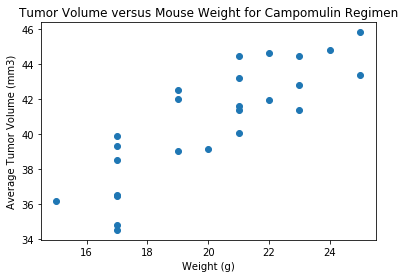

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_regimen = clean_df[clean_df["Drug Regimen"]== "Capomulin"]
cap_mice = cap_regimen.groupby("Mouse ID")
cap_mice_wieght = cap_mice["Weight (g)"].mean()
cap_mice_volume = cap_mice["Tumor Volume (mm3)"].mean()

plt.scatter(cap_mice_wieght, cap_mice_volume)
plt.title("Tumor Volume versus Mouse Weight for Campomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show();

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mice_wieght, cap_mice_volume)
correlation

(0.8419363424694717, 1.322572243471279e-07)

The correlation between mouse weight and tumor volume is 0.84


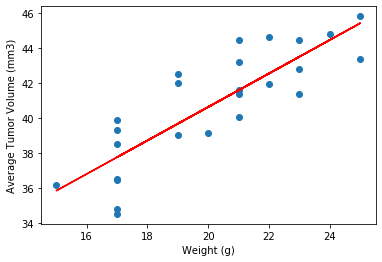

In [20]:
cap_regimen = clean_df[clean_df["Drug Regimen"]== "Capomulin"]
cap_mice = cap_regimen.groupby("Mouse ID")
cap_mice_wieght = cap_mice["Weight (g)"].mean()
cap_mice_volume = cap_mice["Tumor Volume (mm3)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mice_wieght, cap_mice_volume)
regress_values = cap_mice_wieght * slope + intercept

print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")

plt.scatter(cap_mice_wieght, cap_mice_volume)
plt.plot(cap_mice_wieght, regress_values, "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show();